In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score


from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn import svm

from sklearn import linear_model


from sklearn.linear_model import SGDClassifier


from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV


from mlxtend.plotting import plot_confusion_matrix

from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer

import matplotlib.pyplot as plt
import re

from sklearn.pipeline import Pipeline



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competicao-um-ic/train.csv
/kaggle/input/competicao-um-ic/test.csv


In [2]:
datafile = pd.read_csv('/kaggle/input/competicao-um-ic/train.csv')
datafile = datafile.replace(regex=r'\?', value='a')
X = datafile.drop(["DS_STATUS_ITEM",'Unnamed: 0'],axis=1)
Y = datafile["DS_STATUS_ITEM"]
Y = Y.map(dict(Autorizado=1, Negado=0))


In [3]:
Xtypes = X.dtypes
texts = []
for columns in X:
    if Xtypes[columns] == 'O':
        texts.append(columns) 
        
DataTexts = X[texts]
DataTexts = DataTexts.fillna(' ')

DataTexts['texto'] = DataTexts['DS_TIPO_GUIA']+" "+ DataTexts['DS_TIPO_PREST_SOLICITANTE']+" "+ DataTexts['DS_CBO']+" "+ DataTexts['DS_TIPO_CONSULTA']+" "+ DataTexts['DS_UNIDADE_TEMPO_DOENCA']+" "+ DataTexts['DS_TIPO_DOENCA']+" "+ DataTexts['DS_INDICACAO_ACIDENTE']+" "+ DataTexts['DS_TIPO_INTERNACAO']+" "+ DataTexts['DS_REGIME_INTERNACAO']+" "+ DataTexts['DS_CARATER_ATENDIMENTO']+" "+ DataTexts['DS_TIPO_ACOMODACAO']+" "+ DataTexts['DS_TIPO_ATENDIMENTO']+" "+ DataTexts['CD_CID']+" "+ DataTexts['DS_INDICACAO_CLINICA']+" "+ DataTexts['DS_TIPO_ITEM']+" "+ DataTexts['DS_ITEM']+" "+ DataTexts['DS_CLASSE']+" "+ DataTexts['DS_SUBGRUPO']+" "+ DataTexts['DS_GRUPO']


DataTexts.drop(columns=texts,axis=1,inplace=True)

X_final = DataTexts

In [4]:
X_final['texto'] = X_final['texto'].astype(str)
corpo = []
for i in range(0,len(X_final)):
    text = re.sub('[^a-zA-Z]',' ',X_final['texto'][i])
    text = text.lower()
    text = text.split()
    #text = [snow_stemmer.stem(w) for w in text if not w in stopwords.words('portuguese')]
    #text = [w.lower() for w in text if w not in stopwords.words('portuguese')]
    text = " ".join(text)
    corpo.append(text)


In [5]:
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2')),])
#parameters = {'vect__ngram_range': [(1, 1), (1, 2)],'tfidf__use_idf': (True, False),'clf__alpha': (1e-2, 1e-3),}
#gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
#text_clf = gs_clf.fit(corpo, Y)
text_clf = text_clf.fit(corpo, Y)

Modelo LinearSVM acuracia é  71.0 %


Matrix de confusão Modelo LinearSVC 


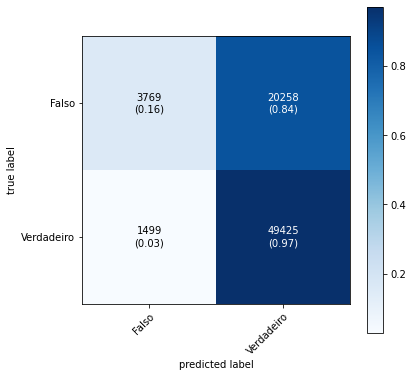

In [7]:
X_train, X_test, y_train, y_test = train_test_split(corpo, Y, test_size=0.33, random_state=42)

text_clf.fit(X_train,y_train)
y_pred = text_clf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Modelo LinearSVM acuracia é ",round(accuracy_score(y_test,y_pred),2)*100,"%")
print("\n")
print("Matrix de confusão Modelo LinearSVM ")
plot_confusion_matrix(cm,class_names=['Falso','Verdadeiro'],show_normed=True,colorbar=True,figsize=(6,6))
plt.show()

In [ ]:
datafile_teste = pd.read_csv('/kaggle/input/competicao-um-ic/test.csv')
X_teste = datafile_teste.drop('Unnamed: 0',axis=1)

X_testetypes = X_teste.dtypes
texts_teste = []
for columns in X_teste:
    if X_testetypes[columns] == 'O':
        texts_teste.append(columns) 

DataTexts_teste = X_teste[texts_teste]
DataTexts_teste = DataTexts_teste.fillna(' ')

DataTexts_teste['texto'] = DataTexts_teste['DS_TIPO_GUIA']+" "+ DataTexts_teste['DS_TIPO_PREST_SOLICITANTE']+" "+ DataTexts_teste['DS_CBO']+" "+ DataTexts_teste['DS_TIPO_CONSULTA']+" "+ DataTexts_teste['DS_UNIDADE_TEMPO_DOENCA']+" "+ DataTexts_teste['DS_TIPO_DOENCA']+" "+ DataTexts_teste['DS_INDICACAO_ACIDENTE']+" "+ DataTexts_teste['DS_TIPO_INTERNACAO']+" "+ DataTexts_teste['DS_REGIME_INTERNACAO']+" "+ DataTexts_teste['DS_CARATER_ATENDIMENTO']+" "+ DataTexts_teste['DS_TIPO_ACOMODACAO']+" "+ DataTexts_teste['DS_TIPO_ATENDIMENTO']+" "+ DataTexts_teste['CD_CID']+" "+ DataTexts_teste['DS_INDICACAO_CLINICA']+" "+ DataTexts_teste['DS_TIPO_ITEM']+" "+ DataTexts_teste['DS_ITEM']+" "+ DataTexts_teste['DS_CLASSE']+" "+ DataTexts_teste['DS_SUBGRUPO']+" "+ DataTexts_teste['DS_GRUPO']

DataTexts_teste.drop(columns=texts_teste,axis=1,inplace=True)

X_final_teste = DataTexts_teste

X_final_teste['texto'] = X_final_teste['texto'].astype(str)
corpo_teste = []
for i in range(0,len(X_final_teste)):
    text = re.sub('[^a-zA-Z]',' ',X_final_teste['texto'][i])
    text = text.lower()
    text = text.split()
    #text = [porter.stem(word) for word in text if not word in stopwords.words('portuguese')]
    text = " ".join(text)
    corpo_teste.append(text)

#X_text_teste = cv.fit_transform(corpo_teste).toarray()

In [ ]:
y_pred = text_clf.predict(corpo_teste)

In [ ]:
Y_final_convertido = np.where(y_pred == 1, "Autorizado","Negado")

In [ ]:
datafinal = pd.DataFrame(Y_final_convertido, columns = ['DS_STATUS_ITEM'])
df = datafile_teste[['Unnamed: 0']].join(datafinal)
df = df.rename({'Unnamed: 0':'ID'},axis = 1)

In [ ]:
df.to_csv('testeSGDCnorandom.csv',index=False)

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("naive bayes accuracy is ",round(accuracy_score(y_test,y_pred),2)*100,"%")
print("\n")
print("confusion matrix for naive bayes ")
plot_confusion_matrix(cm,class_names=['FAKE','REAL'],cmap='Purples',show_normed=True,colorbar=True,figsize=(6,6))
plt.show()

pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)
y_pred = pac.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Passive Aggressive Classifier accuracy is ",round(accuracy_score(y_test,y_pred),2)*100,"%")
print("\n")
print("confusion matrix for Passive Aggressive Classifier ")
plot_confusion_matrix(cm,class_names=['fake','Real'],cmap='Purples',show_normed=True,colorbar=True,figsize=(6,6))
plt.show()